In [5]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

In [6]:
train_data = pd.read_csv("train_data.txt", delimiter=':::', header=None, engine='python')
test_data = pd.read_csv("test_data.txt", delimiter=':::', header=None, engine='python')
test_data_solution = pd.read_csv("test_data_solution.txt", delimiter=':::', header=None, engine='python')

In [7]:
print("shape",train_data.shape)

shape (30438, 4)


In [8]:
train_data.head()

,0,1,2,3
0,1,Oscar et la dame rose (2009),drama,Listening in to a conversation between his do...
1,2,Cupid (1997),thriller,A brother and sister with a past incestuous r...
2,3,"Young, Wild and Wonderful (1980)",adult,As the bus empties the students for their fie...
3,4,The Secret Sin (1915),drama,To help their unemployed father make ends mee...
4,5,The Unrecovered (2007),drama,The film's title refers not only to the un-re...


In [9]:
print("shape",test_data_solution.shape)

shape (32077, 4)


In [10]:
test_data_solution.head()

,0,1,2,3
0,1,Edgar's Lunch (1998),thriller,"L.R. Brane loves his life - his car, his apar..."
1,2,La guerra de papá (1977),comedy,"Spain, March 1964: Quico is a very naughty ch..."
2,3,Off the Beaten Track (2010),documentary,One year in the life of Albin and his family ...
3,4,Meu Amigo Hindu (2015),drama,"His father has died, he hasn't spoken with hi..."
4,5,Er nu zhai (1955),drama,Before he was known internationally as a mart...


In [11]:
df = pd.concat([train_data, test_data_solution])

In [12]:
df.columns = ["id", "Title", "Genre", "Description"]

print(df.head())

   id                               Title       Genre  \
0   1       Oscar et la dame rose (2009)       drama    
1   2                       Cupid (1997)    thriller    
2   3   Young, Wild and Wonderful (1980)       adult    
3   4              The Secret Sin (1915)       drama    
4   5             The Unrecovered (2007)       drama    

                                         Description  
0   Listening in to a conversation between his do...  
1   A brother and sister with a past incestuous r...  
2   As the bus empties the students for their fie...  
3   To help their unemployed father make ends mee...  
4   The film's title refers not only to the un-re...  


In [13]:
print("Missing Values:")
print(df.isnull().sum())


Missing Values:
id             0
Title          0
Genre          0
Description    0
dtype: int64


In [14]:
import string


df['Description'] = df['Description'].str.lower()


df['Description'] = df['Description'].apply(lambda x: ''.join([c for c in x if c not in string.punctuation]))


df['Description'] = df['Description'].apply(lambda x: x.split())

In [16]:
from nltk.corpus import stopwords
import nltk
nltk.download('stopwords')


stop_words = set(stopwords.words('english'))
df['Description'] = df['Description'].apply(lambda x: [word for word in x if word not in stop_words])

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [17]:
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')


lemmatizer = WordNetLemmatizer()
df['Description'] = df['Description'].apply(lambda x: [lemmatizer.lemmatize(word) for word in x])

[nltk_data] Downloading package wordnet to /root/nltk_data...


In [18]:
df = pd.get_dummies(df, columns=['Genre'])

In [19]:
from sklearn.model_selection import train_test_split

X = df['Description']
y = df.drop(['id', 'Title', 'Description'], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [20]:
df.head()

,id,Title,Description,Genre_ action,Genre_ adult,Genre_ adventure,Genre_ animation,Genre_ biography,Genre_ comedy,Genre_ crime,...,Genre_ news,Genre_ reality-tv,Genre_ romance,Genre_ sci-fi,Genre_ short,Genre_ sport,Genre_ talk-show,Genre_ thriller,Genre_ war,Genre_ western
0,1,Oscar et la dame rose (2009),"[listening, conversation, doctor, parent, 10ye...",0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,Cupid (1997),"[brother, sister, past, incestuous, relationsh...",0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,3,"Young, Wild and Wonderful (1980)","[bus, empty, student, field, trip, museum, nat...",0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,The Secret Sin (1915),"[help, unemployed, father, make, end, meet, ed...",0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,The Unrecovered (2007),"[film, title, refers, unrecovered, body, groun...",0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


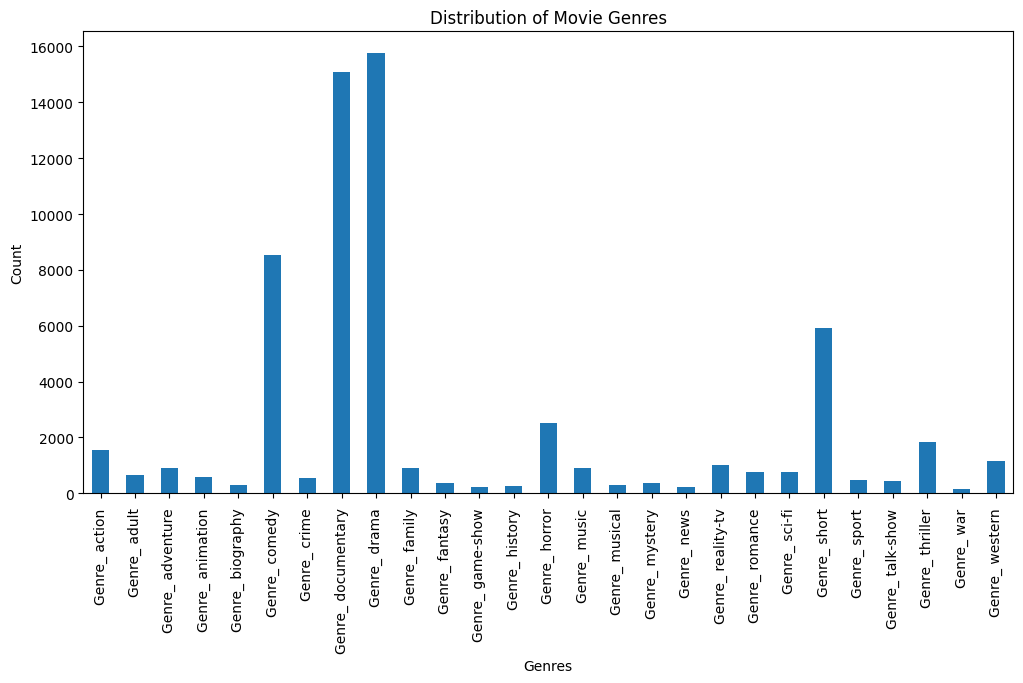

In [21]:

import matplotlib.pyplot as plt

genre_columns = df.columns[3:]

genre_counts = df[genre_columns].sum()
plt.figure(figsize=(12, 6))
genre_counts.plot(kind='bar')
plt.title('Distribution of Movie Genres')
plt.xlabel('Genres')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()


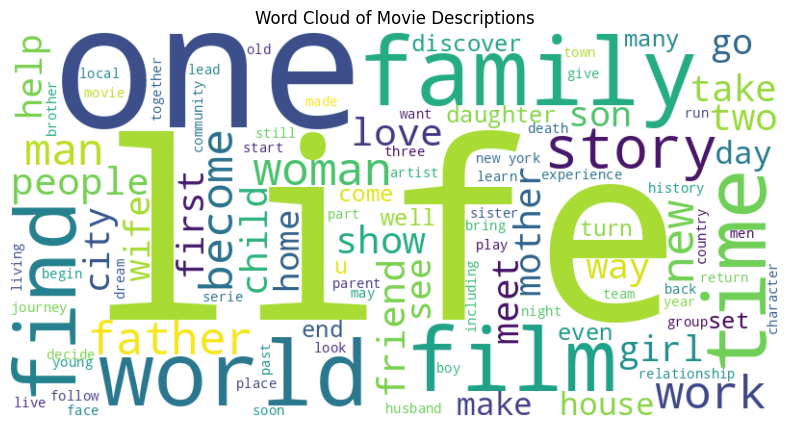

In [22]:
from wordcloud import WordCloud


all_descriptions = ' '.join([' '.join(desc) for desc in df['Description']])
wordcloud = WordCloud(width=800, height=400, max_words=100, background_color='white').generate(all_descriptions)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Movie Descriptions')
plt.show()

In [26]:
df['Word_Count'] = df['Description'].apply(lambda x: len(x))

# Create a new feature: Average Word Length
df['Avg_Word_Length'] = df['Description'].apply(lambda x: sum(len(word) for word in x) / len(x))

# Create binary features for the presence of keywords
keywords = ['action', 'adventure', 'comedy', 'drama', 'romance']  # Replace with relevant keywords
for keyword in keywords:
    df[f'Has_{keyword}_Keyword'] = df['Description'].apply(lambda x: keyword in x).astype(int)
    df.head()

In [27]:
column_names = df.columns
print(column_names)

Index(['id', 'Title', 'Description', 'Genre_ action ', 'Genre_ adult ',
       'Genre_ adventure ', 'Genre_ animation ', 'Genre_ biography ',
       'Genre_ comedy ', 'Genre_ crime ', 'Genre_ documentary ',
       'Genre_ drama ', 'Genre_ family ', 'Genre_ fantasy ',
       'Genre_ game-show ', 'Genre_ history ', 'Genre_ horror ',
       'Genre_ music ', 'Genre_ musical ', 'Genre_ mystery ', 'Genre_ news ',
       'Genre_ reality-tv ', 'Genre_ romance ', 'Genre_ sci-fi ',
       'Genre_ short ', 'Genre_ sport ', 'Genre_ talk-show ',
       'Genre_ thriller ', 'Genre_ war ', 'Genre_ western ', 'Word_Count',
       'Avg_Word_Length', 'Has_action_Keyword', 'Has_adventure_Keyword',
       'Has_comedy_Keyword', 'Has_drama_Keyword', 'Has_romance_Keyword'],
      dtype='object')
